# Test E & C Index calcs

In [1]:
#import my functions
import helpers.fileHandler as fh
import utils._modelDefinitions as _model
import utils._indexDefinitions as _index

In [2]:
import xarray
import numpy
import matplotlib.pyplot as plt

In [3]:
import warnings
#warnings.filterwarnings('ignore')

# 1. Calculate CMIP Indeces

For each experiment in historical, calculate indices

In [4]:
deckSet=['piControl','historical']
scenarioSet=['ssp126', 'ssp245', 'ssp370','ssp585']
experimentSet=[*deckSet, *scenarioSet]

In [5]:
modelSet=_model.scenarioMip

In [6]:
modelSet

array([['CSIRO-ARCCSS', 'ACCESS-CM2', 'r1i1p1f1', 'r1i1p1f1'],
       ['CSIRO', 'ACCESS-ESM1-5', 'r1i1p1f1', 'r1i1p1f1'],
       ['AWI', 'AWI-CM-1-1-MR', 'r1i1p1f1', 'r1i1p1f1'],
       ['BCC', 'BCC-CSM2-MR', 'r1i1p1f1', 'r1i1p1f1'],
       ['CAMS', 'CAMS-CSM1-0', 'r1i1p1f1', 'r1i1p1f1'],
       ['CAS', 'CAS-ESM2-0', 'r1i1p1f1', 'r1i1p1f1'],
       ['NCAR', 'CESM2', 'r1i1p1f1', 'r10i1p1f1'],
       ['NCAR', 'CESM2-WACCM', 'r1i1p1f1', 'r1i1p1f1'],
       ['THU', 'CIESM', 'r1i1p1f1', 'r1i1p1f1'],
       ['CMCC', 'CMCC-CM2-SR5', 'r1i1p1f1', 'r1i1p1f1'],
       ['CMCC', 'CMCC-ESM2', 'r1i1p1f1', 'r1i1p1f1'],
       ['CNRM-CERFACS', 'CNRM-CM6-1', 'r1i1p1f2', 'r1i1p1f2'],
       ['CNRM-CERFACS', 'CNRM-ESM2-1', 'r1i1p1f2', 'r1i1p1f2'],
       ['CCCma', 'CanESM5', 'r1i1p1f1', 'r1i1p1f1'],
       ['CCCma', 'CanESM5-CanOE', 'r1i1p2f1', 'r1i1p2f1'],
       ['EC-Earth-Consortium', 'EC-Earth3', 'r1i1p1f1', 'r1i1p1f1'],
       ['EC-Earth-Consortium', 'EC-Earth3-CC', 'r1i1p1f1', 'r1i1p1f1'],
       ['

In [7]:
sstIndeces = _index.sstIndex.keys()
pslIndeces = _index.pslIndex

In [8]:
len(modelSet)

40

Climatology and piControl:

In [25]:
for iModel in [modelSet[35]]:
    
    print(iModel)
    
    try: 
        #calculate climatology
        
        #SST
        controlXr = fh.loadModelData(iModel[1], 'ts_Amon', 'piControl', iModel[2])
        
        tsXr = fh.loadModelData(iModel[1], 'ts_Amon', 'historical', iModel[2])

        tradIndecesXr = xarray.open_dataset('results/cmipMonthlyIndeces/'+iModel[1]+'_historical.nc')
        
    except Exception as e:
        print(iModel[1] + "Climatology did not calculate")
        print(e)
 

['MRI' 'MRI-ESM2-0' 'r1i1p1f1' 'r1i1p1f1']


In [26]:
from eofs.xarray import Eof



In [53]:
# I don't think I am going to do that.
#instead, reference to the piControl
#detrend using sst temps at the equator

sstMeanXr=controlXr.ts.groupby('time.month').mean(dim='time')

sstAnomXr=tsXr.ts.groupby('time.month'
                         )-sstMeanXr#-tradIndecesXr['backgroundSstNoDetrend']




/home/steketea/anaconda3/envs/testEnv/lib/python3.9/site-packages/xarray/core/indexing.py:1381: PerformanceWarning: Slicing with an out-of-order index is generating 165 times more chunks
  return self.array[key]


In [54]:
sstAnomXr

<xarray.DataArray 'ts' (time: 1980, lat: 160, lon: 320)>
dask.array<getitem, shape=(1980, 160, 320), dtype=float32, chunksize=(1, 160, 320), chunktype=numpy.ndarray>
Coordinates:
  * time     (time) object 1850-01-16 00:00:00 ... 2014-12-16 00:00:00
  * lat      (lat) float64 -89.14 -88.03 -86.91 -85.79 ... 86.91 88.03 89.14
  * lon      (lon) float64 0.0 1.125 2.25 3.375 4.5 ... 355.5 356.6 357.8 358.9
    month    (time) int64 1 2 3 4 5 6 7 8 9 10 11 ... 2 3 4 5 6 7 8 9 10 11 12

In [55]:
#it's not clear what they mean by "multivariate signal-processing method"
domainXr = sstAnomXr.where(
    (sstAnomXr.lat>-15) & (sstAnomXr.lat<15) &
    (sstAnomXr.lon>140) & (sstAnomXr.lon<280),
    drop=True
)

In [56]:
domainXr

<xarray.DataArray 'ts' (time: 1980, lat: 26, lon: 124)>
dask.array<where, shape=(1980, 26, 124), dtype=float32, chunksize=(1, 26, 124), chunktype=numpy.ndarray>
Coordinates:
  * time     (time) object 1850-01-16 00:00:00 ... 2014-12-16 00:00:00
  * lat      (lat) float64 -14.02 -12.9 -11.78 -10.65 ... 10.65 11.78 12.9 14.02
  * lon      (lon) float64 140.6 141.8 142.9 144.0 ... 275.6 276.8 277.9 279.0
    month    (time) int64 1 2 3 4 5 6 7 8 9 10 11 ... 2 3 4 5 6 7 8 9 10 11 12

In [57]:
#although they don't really say this, I've applied an area weighting.

weights = numpy.cos(numpy.deg2rad(domainXr.lat)
                ).values[..., numpy.newaxis]

In [58]:
solver=Eof(domainXr, weights=weights)

ValueError: error encountered in SVD, check that missing values are in the same places at each time and that all the values are not missing

In [33]:


eofsXr=solver.eofs(neofs=2) #only interested in first two modes

eofsXr.sel(mode=0)

<xarray.DataArray 'eofs' (lat: 26, lon: 9)>
array([[-5.78239141e-03, -5.75387292e-03, -5.53436531e-03,
        -5.08072739e-03, -4.46990645e-03, -3.75413010e-03,
        -3.09841358e-03, -2.44953437e-03, -1.95924356e-03],
       [-3.49054881e-03, -3.07558337e-03, -2.55401549e-03,
        -1.79532624e-03, -9.18094418e-04,  1.01830257e-04,
         1.14428718e-03,  2.13989662e-03,  2.97816074e-03],
       [-1.13488524e-04,  8.37910571e-04,  1.87285966e-03,
         3.06293252e-03,  4.27778484e-03,  5.47812693e-03,
         6.75910991e-03,  8.08882900e-03,  9.42386221e-03],
       [ 4.35263757e-03,  5.86383371e-03,  7.45953294e-03,
         9.06567462e-03,  1.06738890e-02,  1.22771505e-02,
         1.38011752e-02,  1.52324066e-02,  1.68785211e-02],
       [ 1.02297170e-02,  1.21772923e-02,  1.41644096e-02,
         1.61269568e-02,  1.81416217e-02,  2.00781301e-02,
         2.18604449e-02,  2.36474555e-02,  2.55812705e-02],
       [ 1.87198538e-02,  2.10017972e-02,  2.32867468e-02,
         2.55707279e-02,  2.78620310e-02,  3.01221926e-02,
         3.22694331e-02,  3.43626440e-02,  3.63688134e-02],
       [ 3.20383571e-02,  3.46273072e-02,  3.71825099e-02,
         3.96896712e-02,  4.21147719e-02,  4.43879031e-02,
...
         2.63121165e-02,  2.74438951e-02,  2.86487136e-02,
         2.99038813e-02,  3.10523696e-02,  3.20780762e-02],
       [ 1.13676349e-02,  1.24301603e-02,  1.34558696e-02,
         1.45545732e-02,  1.56537611e-02,  1.67439785e-02,
         1.76622979e-02,  1.85233094e-02,  1.92462672e-02],
       [ 6.02085143e-03,  6.76724315e-03,  7.62647903e-03,
         8.69753584e-03,  9.94956400e-03,  1.11737167e-02,
         1.21941715e-02,  1.30958296e-02,  1.38299642e-02],
       [ 3.98692675e-03,  4.59804339e-03,  5.42590395e-03,
         6.57669920e-03,  7.91617110e-03,  9.23467148e-03,
         1.03397388e-02,  1.11699775e-02,  1.17691858e-02],
       [ 2.96718604e-03,  3.78697948e-03,  4.75733494e-03,
         5.87230735e-03,  6.99249282e-03,  8.12871661e-03,
         9.00587905e-03,  9.73759033e-03,  1.03991963e-02],
       [ 1.93761953e-03,  2.70914845e-03,  3.54554667e-03,
         4.48608724e-03,  5.36496565e-03,  6.21650647e-03,
         6.93096360e-03,  7.67243607e-03,  8.38331785e-03],
       [-1.33215653e-04,  6.54187868e-04,  1.50214671e-03,
         2.38296087e-03,  3.11288564e-03,  3.79862566e-03,
         4.45046742e-03,  5.04937256e-03,  5.71138086e-03]], dtype=float32)
Coordinates:
    mode     int64 0
  * lat      (lat) float64 -14.02 -12.9 -11.78 -10.65 ... 10.65 11.78 12.9 14.02
  * lon      (lon) float64 190.1 191.2 192.4 193.5 194.6 195.8 196.9 198.0 199.1
Attributes:
    long_name:  empirical_orthogonal_functions

In [34]:
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import matplotlib.pyplot as plt

In [35]:
def ensoPlotter(da, ax):
    cs=plt.contourf(da.lon, da.lat, da.values,  
                    transform=ccrs.PlateCarree(), 
                   center=True)

    gl=ax.gridlines(draw_labels=True, linewidth=1, color='gray', alpha=0.5, linestyle=':')
    ax.coastlines(color='black')
    gl.top_labels=False
    #gl.left_labels=False

        #bottom legend
    cbar=plt.colorbar(orientation='horizontal', fraction=0.05, pad=0.05)

/home/steketea/anaconda3/envs/testEnv/lib/python3.9/site-packages/cartopy/mpl/geoaxes.py:1508: UserWarning: The following kwargs were not used by contour: 'center'
  result = matplotlib.axes.Axes.contourf(self, *args, **kwargs)
/home/steketea/anaconda3/envs/testEnv/lib/python3.9/site-packages/cartopy/io/__init__.py:260: DownloadWarning: Downloading: https://naciscdn.org/naturalearth/10m/physical/ne_10m_coastline.zip
  warnings.warn('Downloading: {}'.format(url), DownloadWarning)


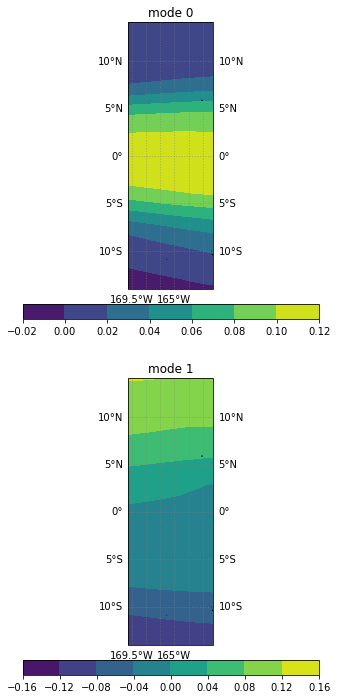

In [36]:
fig=plt.figure(figsize=(18,12))

for mode in [0,1]:
    ax=fig.add_subplot(2,1,mode+1,
                       projection=ccrs.Miller(central_longitude=210))

    ensoPlotter(eofsXr.sel(mode=mode), ax)
    
    plt.title("mode " + str(mode))

In [37]:
pcTimeXr=solver.pcs(pcscaling=1, npcs=2) #scaling 1: scaled to unit variance

In [38]:
pcTimeXr.std('time')

<xarray.DataArray 'pcs' (mode: 2)>
array([0.99974763, 0.9997473 ], dtype=float32)
Coordinates:
  * mode     (mode) int64 0 1

In [39]:
pc1 = pcTimeXr.sel(mode=0)
pc2 = pcTimeXr.sel(mode=1)

In [40]:
import utils.timePeriod as tp

In [41]:
tp.averageForTimePeriod(pc1.rename('enso').to_dataset())

<xarray.Dataset>
Dimensions:  (year: 164)
Coordinates:
    mode     int64 0
  * year     (year) int64 1850 1851 1852 1853 1854 ... 2009 2010 2011 2012 2013
Data variables:
    enso     (year) float32 0.6102 0.104 -0.6364 -1.265 ... 0.6058 2.355 -0.3434

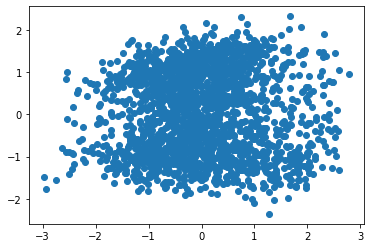

In [42]:
fig = plt.figure()

plt.scatter(pc1.values, pc2.values)

In [43]:
cXr=(pc1+pc2)/numpy.sqrt(2)
eXr=(pc1-pc2)/numpy.sqrt(2)

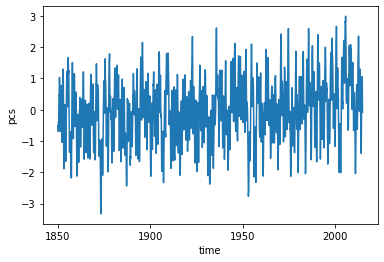

In [44]:
cXr.plot()

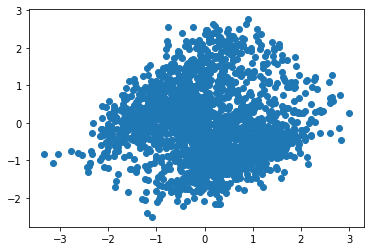

In [45]:
fig = plt.figure()

plt.scatter(cXr.values, eXr.values)